# 2. Distributions

In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [2]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from thinkstats import decorate

# 2.1 Frequency Tables
Frequency tables contains the values of the variate and the times it is repeating itself i.e., their frequency in a distribution.
This description is called as distribution.

To represent distributions, we use a library called as `empiricaldist` where empirical means that the distributions are based on the data rather than mathematical proofs or models.
- Provides `FreqTab`: Compute and plot frequency tables.

In [4]:
from empiricaldist import FreqTab

In [5]:
val = [10, 20, 20, 30, 40, 40, 60, 20, 50, 30]

In [6]:
freqtab = FreqTab.from_seq(val)
freqtab

10    1
20    3
30    2
40    2
50    1
60    1
Name: , dtype: int64

- The resulting table is pandas series.

- To plot the frequency of the variates on using bar graph we can use `bar()` method.

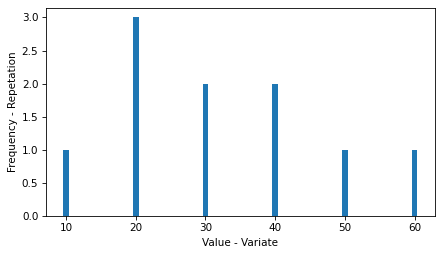

In [7]:
freqtab.bar()
decorate(xlabel="Value - Variate", ylabel="Frequency - Repetation")

In [8]:
freqtab[20]

np.int64(3)

- Returning array of frequencies. 

In [9]:
freqtab.fs

array([1, 3, 2, 2, 1, 1])

- Looping over variate and it's frequency using `items()` method.

In [10]:
print("xi | frequency")
for x, freq in freqtab.items():
    print(f"{x} | {freq}")

xi | frequency
10 | 1
20 | 3
30 | 2
40 | 2
50 | 1
60 | 1


# 2.2 NSFG Distribution

In [11]:
# needed to read the data from the dataset
try:
    import statadict
except ImportError:
    !pip install statadict

In [12]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

- Read the pregnancy data from the nsfg dataset. 

In [13]:
from nsfg import read_fem_preg
preg = read_fem_preg()

In [14]:
# select the rows from preg column which resulted in
# live birth i.e., outcomes == 1
live = preg.query("outcome == 1")

### Example 1:
- Count the number of times each quantity appears in birthwgt_lb (pounds).

In [15]:
ftab_lb = FreqTab.from_seq(live["birthwgt_lb"], name="birthwgt_lb") # names attr gives the FreqTab object a name

In [16]:
ftab_lb

birthwgt_lb
0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

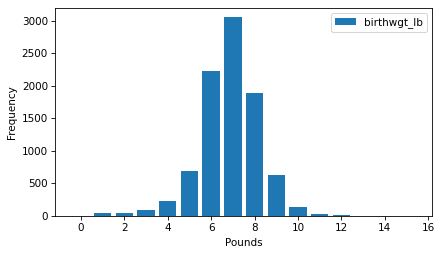

In [17]:
ftab_lb.bar()
decorate(xlabel="Pounds", ylabel='Frequency')

- The above shows a bell curve which indicates a normal distribution or Gaussian Distribution.
- we can also find the measure of central tendency like mode using `idxmax` method or `mode` methods.

In [18]:
ftab_lb.idxmax()

np.float64(7.0)

In [19]:
ftab_lb.mode()

np.float64(7.0)

### Example 2:
- We can also plot other columns such as `birthwgt_oz` which shows the weight in ounces.

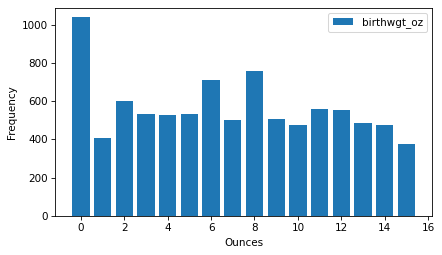

In [20]:
ftab_oz = FreqTab.from_seq(live["birthwgt_oz"], name="birthwgt_oz")
ftab_oz.bar()
decorate(xlabel="Ounces", ylabel="Frequency")

### Example 3:
Plotting the mother's age at the time of birth from `agepreg` column.

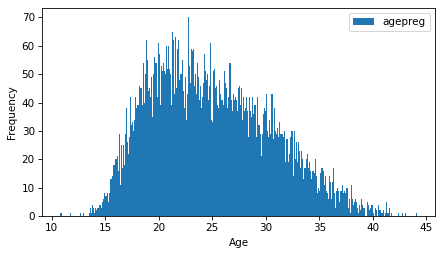

In [21]:
ftab_age = FreqTab.from_seq(live["agepreg"], name="agepreg")
ftab_age.bar(width=0.1) # adjust the width of the bars
decorate(xlabel="Age", ylabel="Frequency")

- As we can see the distribution of data is rougly bell curved (**Symmetric**), it is **right-skewed** or **Positively-skewed** which means that it's tail is extending towards the right to the <u>larger values of x variate</u>.

### Example 4:
Frequency table of pregnancy length `prglngth` (in weeks).

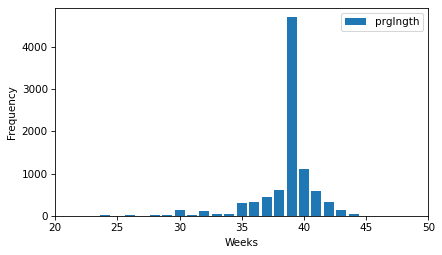

In [22]:
ftab_length = FreqTab.from_seq(live["prglngth"], name="prglngth")
ftab_length.bar()
# xlim sets the limit to the range from 20 to 50 weeks to avoid errors as there
# are NaN values.
decorate(xlabel="Weeks", ylabel="Frequency", xlim=[20, 50])

In [23]:
ftab_length.mode()

np.int64(39)

## 2.3 Outliers
Outliers are extreme values or scores which affect the mean directly and that might be measurement or recording errors, or might be accurate reports of rare events.

### Identifying outliers

In [24]:
# gives the 10 top smallest values (outliers)
def smallest(ftab, n=10):
    return ftab[:n]

In [25]:
smallest(ftab_length)

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: prglngth, dtype: int64

In [26]:
# gives the largest outliers from the end of frequency table
def largest(ftab, n=10):
    return ftab[-n:]
largest(ftab_length)

prglngth
40    1116
41     587
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

## 2.4 First Babies
The question is being asked here is that whether first babies tend to be earlier or later than other babies.

In [27]:
firsts = live.query("birthord == 1")
others = live.query("birthord != 1")

In [31]:
ftab_first = FreqTab.from_seq(firsts["prglngth"], name="firsts")
ftab_others = FreqTab.from_seq(others["prglngth"], name="others")

- Function for plotting two frequency tables side by side

In [32]:
def two_bar_plots(ftab1, ftab2, width=0.45):
    ftab1.bar(align="edge", width=-width)
    ftab2.bar(align="edge", width=width, alpha=0.5)

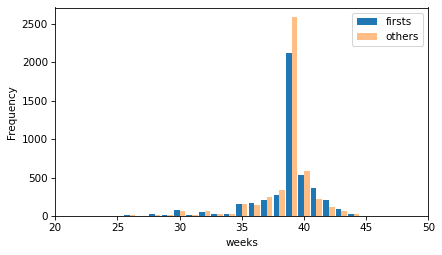

In [33]:
two_bar_plots(ftab_first, ftab_others)
decorate(xlabel="weeks", ylabel="Frequency", xlim=[20, 50])

In [34]:
firsts["prglngth"].count(), others["prglngth"].count()

(np.int64(4413), np.int64(4735))

- On counting mean, it looks like first babies are a a little bit later on average. 

In [35]:
first_mean = firsts["prglngth"].mean()
other_mean = others["prglngth"].mean()
first_mean, other_mean

(np.float64(38.60095173351461), np.float64(38.52291446673706))

- Here, the difference of births is only 0.078 weeks which is equivalent to 13 hours

In [36]:
diff = first_mean - other_mean
diff, diff * 7 * 24

(np.float64(0.07803726677754952), np.float64(13.11026081862832))

## 2.5 Effect Size
A difference like above is known as "effect". 

- Reporting difference: here, the first pregnancies are 0.2% longer than others, on average.

In [37]:
diff / live["prglngth"].mean() * 100

np.float64(0.20237586646738304)

- Reporting in **Standardized** effect size, which is a intended to quantify the size of an effect in a way that is comparable between different quantities and different groups.
- Standardizing means we express the difference as a multiple of the standard deviation.

In [38]:
diff / live["prglngth"].std()

np.float64(0.028877623375210403)

### Pooled standard deviation
It is the square root of pooled variane, which is the weighted sum of the variances in the groups.

In [39]:
group1, group2 = firsts["prglngth"], others["prglngth"]

In [40]:
# calculate variance of both groups
v1, v2 = group1.var(), group2.var()

In [41]:
# find the number of values in each group
n1, n2 = group1.count(), group2.count()
pooled_var = (n1 * v1 + n2 * v2) / (n1 + n2)

In [42]:
# pooled deviation
np.sqrt(pooled_var)

np.float64(2.7022108144953862)

### Cohen's effect
A Standardized effect size that uses pooled standard deviation is called Coahen's effect size.

In [43]:
# calculate cohen's effects size

In [45]:
def cohen_effect_size(group1, group2):
    diff = group1.mean() - group2.mean() # calculate difference
    n1, n2 = group1.count(), group2.count() # calculate number of observations
    v1, v2 = group1.var(), group2.var() # calculate variance

    # calculate pooled_variance
    pooled_variance = (n1*v1 + n2*v2) / (n1 + n2)

    return diff/np.sqrt(pooled_variance)

In [46]:
cohen_effect_size(firsts["prglngth"], others["prglngth"])

np.float64(0.028879044654449834)